In [ ]:

pip install plotly


In [1]:
import numpy as np
import re
import statistics as stat
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats
import statsmodels.distributions.empirical_distribution as edf
import statistics
import matplotlib as mpl

In [8]:
spec_z=[]
with open('MPhys/gpz_files/PRED_20_split.cat','r') as file_spec:
    for _ in range(1):
        next(file_spec)
    for line_spec in file_spec:
        test_spec = re.sub("\s+", ",", line_spec.strip()) #takes any spaces and replaces with comma to make split easier
        tokens_spec = test_spec.split(',')
        #print(tokens[4])
        spec_z.append(tokens_spec[13])


In [9]:
spec_z

['1.1957',
 '0.6913',
 '0.8927',
 '0.545',
 '1.468',
 '0.8927',
 '0.8655',
 '0.2238',
 '0.6636',
 '0.63',
 '1.5093',
 '1.9227',
 '2.7886',
 '3.913',
 '2.2246',
 '1.2144',
 '1.919',
 '0.8353',
 '2.521',
 '0.6564',
 '1.84',
 '0.5848',
 '0.8112',
 '0.2324',
 '2.5715',
 '1.0959',
 '3.6337',
 '0.7378',
 '2.749',
 '1.4073',
 '0.2066',
 '1.2807',
 '1.076',
 '3.4426',
 '0.7017',
 '1.599',
 '3.222',
 '0.6576',
 '0.9107',
 '1.5168',
 '0.4191',
 '2.1598',
 '1.7346',
 '0.8258',
 '1.423',
 '1.1731',
 '1.5358',
 '0.8899',
 '0.2738',
 '1.051',
 '0.2214',
 '0.6283',
 '0.8851',
 '0.7456',
 '1.4145',
 '0.7736',
 '2.8057',
 '1.5043',
 '0.3445',
 '1.2389',
 '0.2875',
 '0.8636',
 '0.8936',
 '1.0678',
 '1.0117',
 '0.6201',
 '0.2333',
 '1.6026',
 '0.3404',
 '1.1793',
 '1.477',
 '1.3002',
 '0.9426',
 '0.148',
 '0.6854',
 '1.4571',
 '0.9119',
 '0.7923',
 '0.8851',
 '1.4547',
 '2.42',
 '0.2239',
 '1.0607',
 '1.0867',
 '0.9947',
 '0.8851',
 '1.7635',
 '2.1243',
 '0.3722',
 '2.42',
 '2.0374',
 '0.887',
 '3.641',


In [ ]:
for nbf in np.linspace(10,100,4, dtype=int):
    delta_z = []
    outliers = []
    #outlier_frac_sig=[]
    j=0
    k=0
    phot_z =[]
    uncert = []
    with open(f'MPhys/parameter_files/gpz_{nbf}_seq_cut.cat','r') as file:
        for _ in range(11):
            next(file)
        for line in file:
            test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
            tokens = test.split(',')
            #print(tokens[4])
            phot_z.append(float(tokens[0]))
            uncert.append(float(tokens[1]))

    for i in range(len(phot_z)):
        delta_z.append(abs(float(phot_z[i])-float(spec_z[i])))
        outliers.append(float(delta_z[i])/(1+float(spec_z[i])))
        
        if abs(outliers[i])>0.15:
            j+=1
        if abs(outliers[i])>(3*uncert[i]):
            k+=1
    outlier_frac = j/len(spec_z)
    outlier_frac_sig =(k/len(spec_z))
    print(outlier_frac_sig, outlier_frac)
    
    sig_nmad = (scipy.stats.median_abs_deviation(outliers))
    sig_nmad_2 = 1.48*(np.median(outliers))
   # with open(f'MPhys/sig_nmad_seq_cut_MAD_test.txt', 'a') as file_sig:
   #     if nbf == 100:
   #         file_sig.write('NUMBF'+'    '+'sig_nmad'+'    '+'outlier_frac'+'\n')
   #     file_sig.write(str(nbf)+','+ str(sig_nmad)+','+str(outlier_frac)+'\n')
#file_sig.close()

In [26]:
nbf_values =[]
for j in np.linspace(10,100,4, dtype=int):
    nbf_values.append(int(j))
for i in np.linspace(100,500,9, dtype=int):
    nbf_values.append(int(i))


print(nbf_values)

[10, 40, 70, 100, 100, 150, 200, 250, 300, 350, 400, 450, 500]


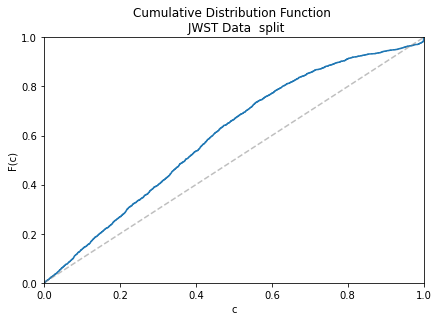

In [11]:
#fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [20, 2]})
fig, ax = plt.subplots(1,1)
fig.tight_layout()
#for nbf in nbf_values:
    #sig = []
delta_z = []
outliers = []
j=0
phot_z =[]
n=[]
c=[]
f=[]
uncert=[]
with open('MPhys/gpz_files/gpz_jwst_gpgc.cat','r') as file:
    for _ in range(11):
        next(file)
    for line in file:
        test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
        tokens = test.split(',')
        #print(tokens[4])
        phot_z.append(float(tokens[0]))
        uncert.append(float(tokens[1]))

for i in range(len(phot_z)):
    delta_z.append(float(phot_z[i])-float(spec_z[i]))
    outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

    if outliers[i]>0.15:
        j+=1
outlier_frac = j/len(spec_z)
sig_nmad = 1.48*(np.median(outliers))

for j in range(len(delta_z)):
    n.append(float(-delta_z[j])/(uncert[j]*np.sqrt(2)))
    c.append(np.abs(math.erf(n[j])))

#print(np.mean(c))
#cool = cm = plt.get_cmap('cool') 
# colours = plt.cm.cool(nbf/500)






#ax[0].ecdf(c), label = f'{nbf} Base Functions', color = colours,alpha = 0.6)
ax.ecdf(c)#, label = f'{nbf} Base Functions', color = colours,alpha = 0.6)

ax.set_xlabel('c')
ax.set_ylabel('F(c)')
#ax[1].set_ylabel('Number of Base Functions')

ax.set_title('Cumulative Distribution Function \n JWST Data  split')
x = np.linspace(0,1,10)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

#norm = mpl.colors.Normalize(vmin=np.min(nbf_values), vmax=np.max(nbf_values))
#cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap='cool',norm=norm,orientation='vertical')



ax.plot(x,x,linestyle = '--', color = 'grey', alpha= 0.5)

plt.savefig('MPhys/gpz_files/combined_ecdf_run3_gpgc.png', bbox_inches='tight')


In [12]:
file_nmad = open('MPhys/sig_nmad_seq_cut_MAD_test.txt','r')
numbf=[]
sig_nmad=[]
outlier_new=[]
for _ in range(1):
    next(file_nmad)
for line in file_nmad:
    split = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
    tokens = split.split(',')
    #print(tokens[4])
    numbf.append(float(tokens[0]))
    sig_nmad.append(float(tokens[1]))
    outlier_new.append(float(tokens[2]))
fig,axs= plt.subplots(2,1, sharex =True, constrained_layout = True)
#print(sig_nmad)
y_tix = np.linspace(np.min(sig_nmad),np.max(sig_nmad),len(sig_nmad))
axs[0].plot(numbf,sig_nmad, marker = 'o')
axs[0].set_title(''r'$\sigma_{NMAD}$ against NUMBF')
axs[1].set_xlabel('Number of Base Functions')
axs[0].set_ylabel(''r'$\sigma_{NMAD}$')
axs[0].set_xticks(numbf, minor=True)
axs[1].plot(numbf,outlier_new, color='orange', marker = 'D')
axs[1].set_title('Outlier Fraction against NUMBF')
axs[1].set_ylabel('Outlier Fraction')
#ax.invert_yaxis()
fig.savefig('MPhys/gpz_files/sig_OF_gpgc', bbox_inches='tight')

NameError: name 'file_nmad' is not defined

In [ ]:
##quantifying errors
